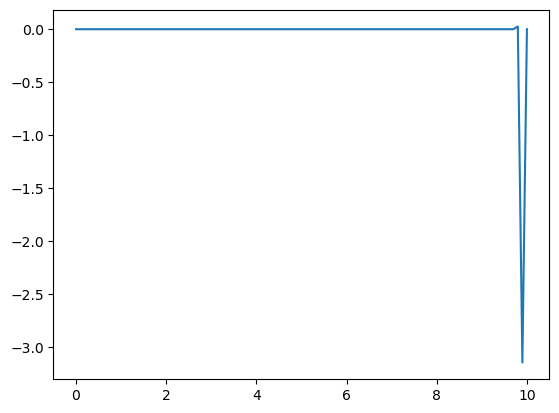

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

# defining time and space coordinates
t=np.linspace(0,10,100)
dt=t[2]-t[1]
r=np.linspace(0,10,100)
dr=r[2]-r[1]

# defining constants that appear in the Schrodinger eqn
hbar=1
m=1
c1=hbar/dt
c2=(hbar**2)/(m*dr*dr)

#defining a potential the Schrodinger equation will fight with
v=np.zeros((100,100))

# Initializing wavefunction as random space-time matrix at moment 0. It collapes to a valid solution after iteration
psi=np.zeros((100,100))
psi0=5 + np.random.rand(100,1)
psi[:,0]=psi0[:,0]
psi[0,0]=0
psi[99,0]=0

# Initializing helper wavefunction that will determine normalization constant in each step
psiint=np.zeros(100)

#Bulk of simulation: iterates over known time moment into the next, always normalizing. The TDSE is solved numerically
for j in range(1,98):
    for i in range(1,99):
        for m in range(0,100):
            psiint[m]=psi[m,j-1]
        psiint=psiint*psiint
        psiint=psiint*dr
        integral=np.sum(psiint)
        k=1/math.sqrt(integral)
        for l in range(0,99):
            psi[l,j-1]=psi[l,j-1]*k
        psi[i,j]=(c1*psi[i-1,j]+c2/2*(psi[i-1,j-1]+psi[i-1,j+1]-2*psi[i-1,j]))/(c1+v[i,j])

#Extracting solution by using some arbitrary wavefunction at a much later moment than starting.
psirand=np.zeros(100)
for i in range(0,99):
    psirand[i]=psi[i,90]

plt.figure()
plt.plot(r,psirand)
plt.show()